In [65]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc, cm
from scipy.ndimage import imread
from skimage.measure import block_reduce
#import cPickle as pickle
from scipy.ndimage.filters import correlate, convolve
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [ ]:
"""
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")
images, labels = mnist.train.images, mnist.train.labels
images = images.reshape((55000,28,28))
np.savez_compressed("MNIST_data/train", images=images, labels=labels)
"""

In [83]:
def plots(ims, interp=False, titles=None, images_per_row=None):
    ims=np.array(ims)
    #it's better to calculate the min and max for each image, rathen then using the min and max of all images
    #otherwise one image with high contrast will blur other less contrast images, see below example
    #mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    l = len(ims)
    images_per_row = l if images_per_row is None else images_per_row
    r = int(l/images_per_row)
    for i in range(l):
        sp=f.add_subplot(r, images_per_row, i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        #plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx) 
        #use ims[i].min and max instead of mn, mx
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=ims[i].min(),vmax=ims[i].max())

def plot(im, interp=False, title=None):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')
    if title is not None: plt.title(title, fontsize=18)

plt.gray()
plt.close()

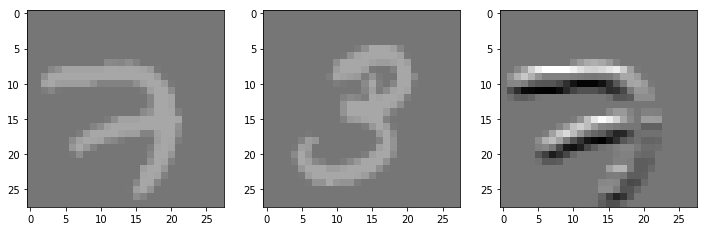

In [61]:
#example of using mn, mx as vmin and vmax if plots. see the comments in plots
#plots([images[0], images[1], corrtop])

In [4]:
data = np.load("MNIST_data/train.npz")
images=data['images']
labels=data['labels']
n=len(images)
images.shape

(55000, 28, 28)

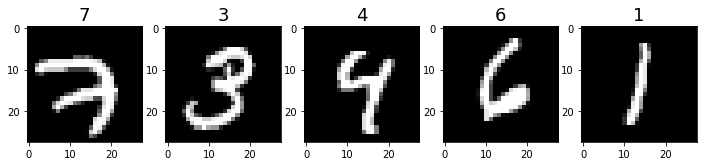

In [73]:
plots(images[:5], titles=labels[:5])
#plot(images[0])

In [5]:
images[0]

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , 

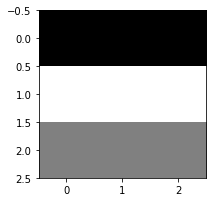

In [13]:
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]

plot(top)

In [87]:
r=(0,28)
def zoomim(i=0, x1=0,x2=28,y1=0,y2=28):
    plot(images[i,y1:y2,x1:x2], title=labels[i])
w=interactive(zoomim, i=r, x1=r,x2=r,y1=r,y2=r)



In [89]:
#show the widget in a seperated cell, or the widget will not get shown fully
w

interactive(children=(IntSlider(value=0, description='i', max=28), IntSlider(value=0, description='x1', max=28…

In [99]:
k=w.kwargs
dims = np.index_exp[k['y1']:k['y2']:1,k['x1']:k['x2']]
i = k['i']
dims
#images[0][dims]

(slice(3, 27, 1), slice(4, 23, None))

In [93]:
images[i][dims]
#help(np.lib.index_tricks)

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , 

In [100]:
corrtop = correlate(images[i], top)

In [34]:
#??correlate
??corrtop

In [95]:
images[i][dims], corrtop[dims]
#corrtop[dims]
#top

(array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    

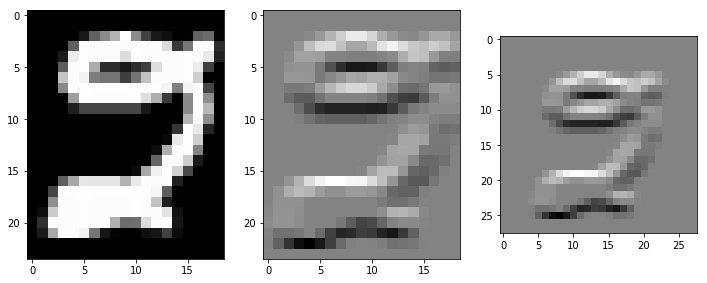

In [104]:
#plots([images[i][dims], corrtop[dims]])
#plots([images[i], corrtop])
plots([images[i][dims], corrtop[dims], corrtop])
#plots(images[0:1], titles=['origin', 'top'])
#images[0:1]

In [41]:
np.rot90(top, 1)

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

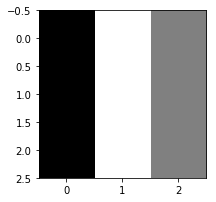

In [42]:
plot(np.rot90(top, 1))

True

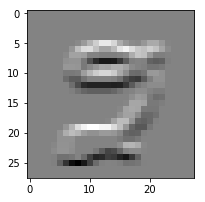

In [107]:
convtop = convolve(images[i], np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop)

In [44]:
??np.allclose

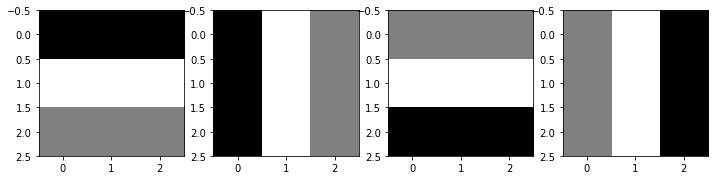

In [105]:
straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

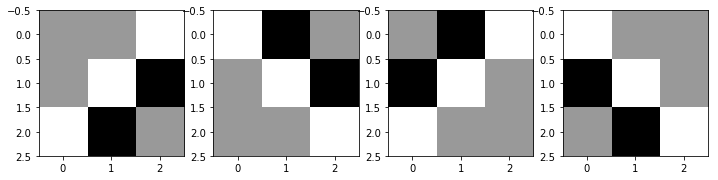

In [106]:
br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

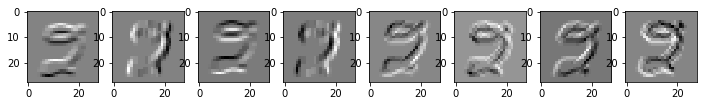

In [109]:
rots = straights + diags
corrs = [correlate(images[i], rot) for rot in rots]
plots(corrs)

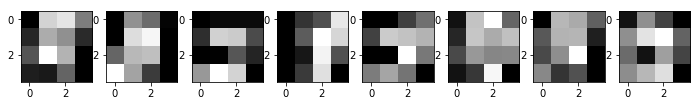

In [110]:
def pool(im): return block_reduce(im, (7,7), np.max)

plots([pool(im) for im in corrs])

In [111]:
??block_reduce

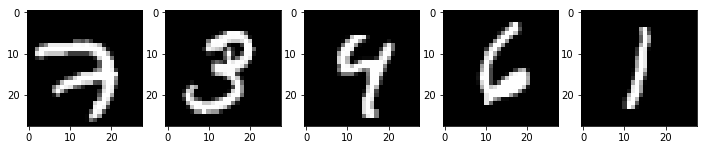

In [119]:
plots(images[:5])

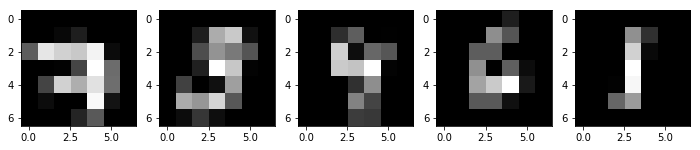

In [130]:
def mypool(img): return block_reduce(img, (4,4), np.sum)

plots([mypool(im) for im in images[:5]])

In [132]:
eights=[images[i] for i in range(n) if labels[i]==8]
ones=[images[i] for i in range(n) if labels[i]==1]

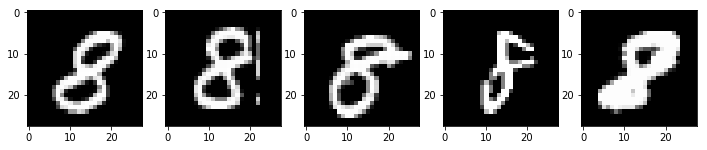

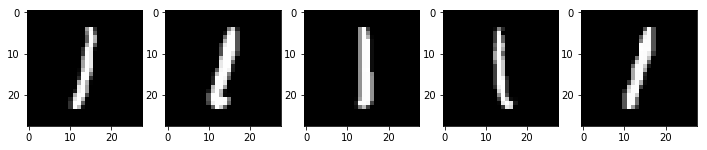

In [133]:
plots(eights[:5])
plots(ones[:5])

In [134]:
pool8 = [np.array([pool(correlate(im, rot)) for im in eights]) for rot in rots]

In [135]:
len(pool8), pool8[0].shape

(8, (5389, 4, 4))

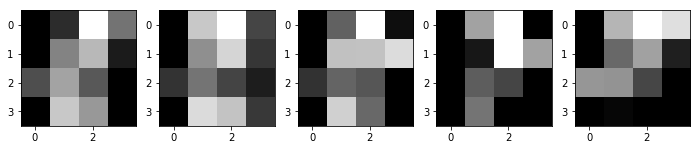

In [136]:
plots(pool8[0][0:5])

In [137]:
def normalize(arr): return (arr-arr.mean())/arr.std()

In [138]:
filts8 = np.array([ims.mean(axis=0) for ims in pool8])
filts8 = normalize(filts8)

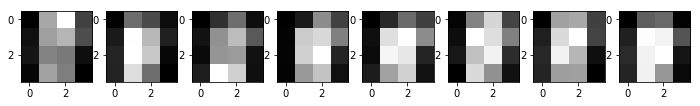

In [139]:
plots(filts8)

In [142]:
pool1 = [np.array([pool(correlate(im, rot)) for im in ones]) for rot in rots]
filts1 = np.array([ims.mean(axis=0) for ims in pool1])
filts1 = normalize(filts1)

In [140]:
??normalize

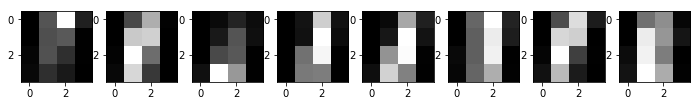

In [143]:
plots(filts1)

In [144]:
def pool_corr(im): return np.array([pool(correlate(im, rot)) for rot in rots])

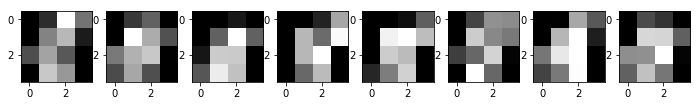

In [145]:
plots(pool_corr(eights[0]))

In [146]:
def sse(a,b): return ((a-b)**2).sum()
def is8_n2(im): return 1 if sse(pool_corr(im),filts1) > sse(pool_corr(im),filts8) else 0

In [147]:
sse(pool_corr(eights[0]), filts8), sse(pool_corr(eights[0]), filts1)

(126.77776, 181.26105)

In [148]:
[np.array([is8_n2(im) for im in ims]).sum() for ims in [eights,ones]]

[5223, 287]

In [149]:
[np.array([(1-is8_n2(im)) for im in ims]).sum() for ims in [eights,ones]]

[166, 5892]

In [150]:
def n1(a,b): return (np.fabs(a-b)).sum()
def is8_n1(im): return 1 if n1(pool_corr(im),filts1) > n1(pool_corr(im),filts8) else 0

In [151]:
[np.array([is8_n1(im) for im in ims]).sum() for ims in [eights,ones]]

[5129, 254]

In [152]:
[np.array([(1-is8_n1(im)) for im in ims]).sum() for ims in [eights,ones]]

[260, 5925]